# Introduction to Image Processing and Computer Vision

For this guide, I have assumed that you have a running linux OS preferably Ubuntu 18.04 or higher and have python3

## < some image showing both cv and image processing >

Table of contents:
1. What are Images?
2. What is Image Processing?
2. What is Computer Vision?
3. Difference between Image Processing and Computer Vision
4. What is OpenCV?
5. Setting up OpenCV and other commonly used libraries for working with images.
6. 


Inside this guide, you’ll learn basic image processing operations using the OpenCV library using Python.

____

## What are images?

"**A picture is worth a thousand words**" is an English language adage meaning that complex and sometimes multiple ideas can be conveyed by a single still image, which conveys its meaning or essence more effectively than a mere verbal description.

Many of us may or may not know who is in the image but one thing we can surely say is that it is an image of a person.

#### This is an image of 16th U.S. President **Abraham Lincoln**

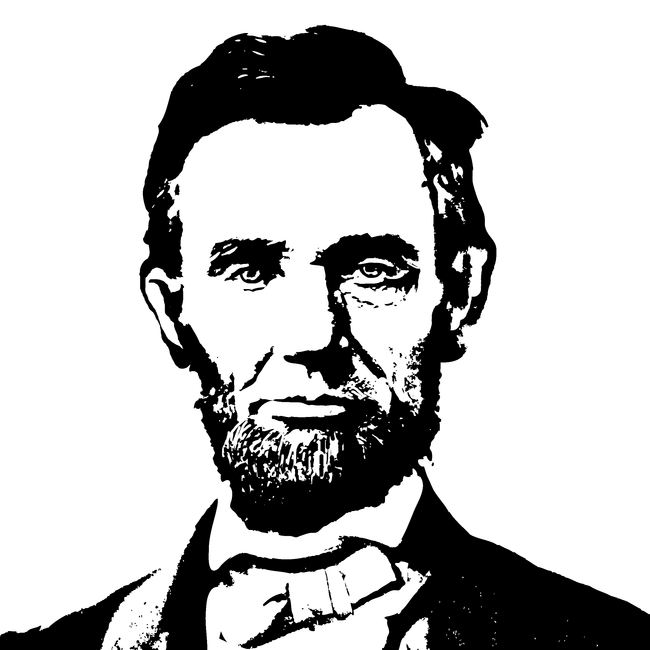

In [58]:
Image(filename='resources/lincon-image-binary.png', width=500, height=700)

* What we humans percieve just by looking at a picture, the same is not true for machines. In fact, for a computer, this is what an image looks like.

* **It is just an array of pixels** 

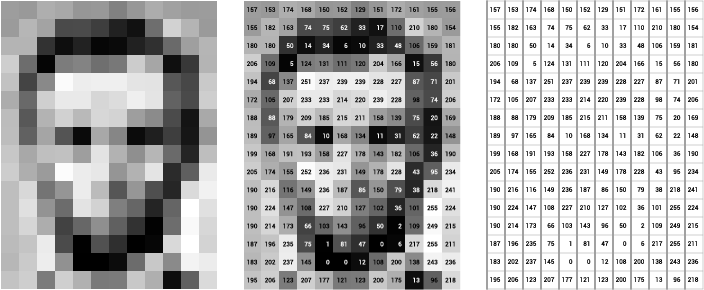

In [59]:
Image(filename='resources/lincon.png', width=900, height=600) 

* For the sake of simplicity, I have taken a black & white or technically speaking, a ****Binary** image!

* What we usually have around us are colored images. They consist of 3 arrays or 3 channels stacked together which we percieve as a colored image such as one shown below.

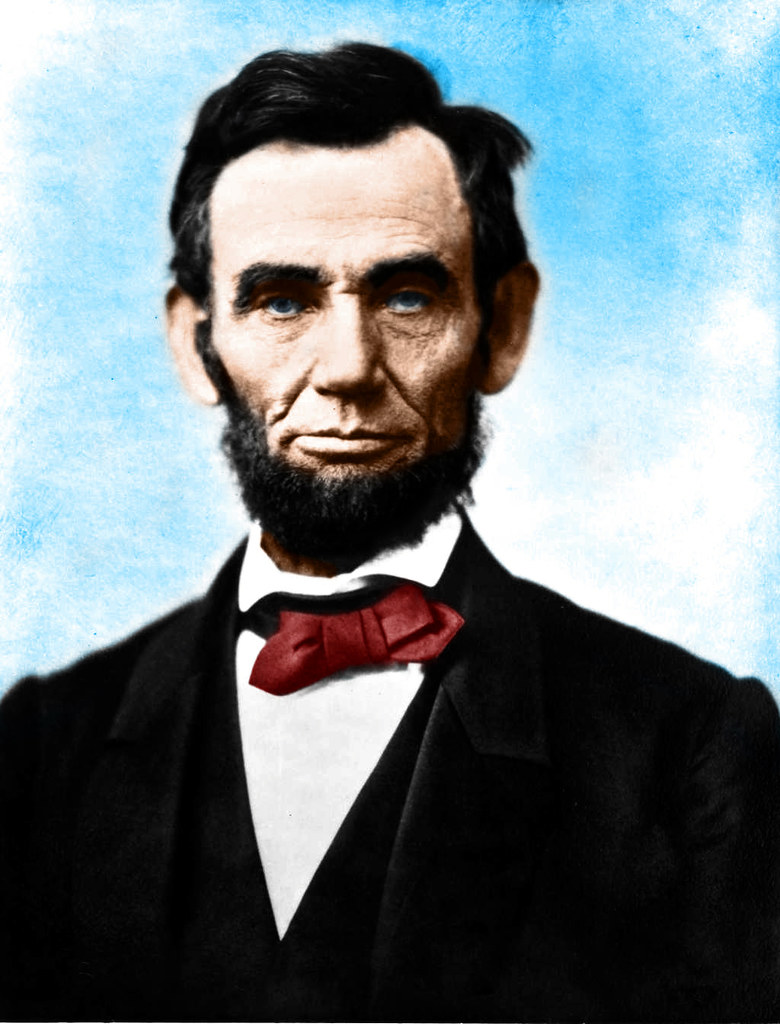

In [60]:
Image(filename='resources/lincon-image-color.jpg', width=500, height=700)

____

## What is OpenCV?
* OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library that contains various functions to perform operations on pictures or videos. It was originally developed by Intel but was later maintained by Willow Garage and is now maintained by Itseez. This library is cross-platform that is it is available on multiple programming language such as Python, C++ etc.

For more information, check out the following links:
* https://opencv.org/about/
* https://github.com/opencv/opencv

____

## Setting-up OpenCV

While there are multiple guides available online for installing OpenCV, for my ease, I have put together all the commands in one handy shell script. Here it is: https://github.com/anujonthemove/opencv-installation


Some of poplular blogs/guides that I have used to compile my script: 
1. https://www.learnopencv.com/install-opencv-4-on-ubuntu-16-04/
2. https://www.pyimagesearch.com/2018/08/15/how-to-install-opencv-4-on-ubuntu/

## What is Image Processing?
Image processing is essentially application of mathematical operations on images which gives us a transformed image. To call out, some of the commonly known transformations include blurring, sharpening, resizing, rotating etc.

## Let us see the operation of "blurring" an image in action

In [27]:
%%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data


def f(Median_Size):
    selem = disk(int(Median_Size))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_median = rank.median(img_gray, selem=selem) 

    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    display(fig)

image = skimage.data.camera() #plt.imread("Test.png")       
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(14, 12))

ax_orig = fig.add_subplot(121) 
ax_orig.axis('off')

ax_neu = fig.add_subplot(122) 
ax_neu.axis('off')

ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")

In [28]:
interact(f, Median_Size=widgets.IntSlider(min=0,max=20,step=2,value=0));

interactive(children=(IntSlider(value=0, description='Median_Size', max=20, step=2), Output()), _dom_classes=(…

# Basic Operations on Images
* Reading image using OpenCV
* Access pixel values and modify them
* Access image properties
* Setting Region of Image (ROI)
* Splitting and Merging images

## Reading image using OpenCV

In [39]:
import cv2 # <- opencv library import, that's it!

In [41]:
img = cv2.imread('./resources/messi.jpg')

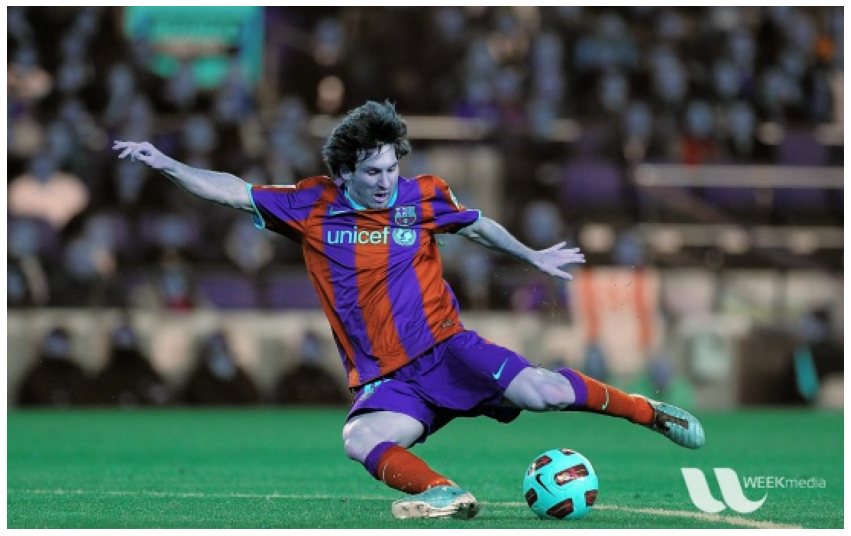

In [42]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img)
plt.show()

### Note: 
We can see something is off in this image. Messi's skin color is slightly blue? Well, the reason behind this is that OpenCV reads images in BGR format where as matplotlib works in RGB format therefore, in order to properly display this image we have to changed color space from BGR to RGB. Changing colorspaces is also we are going to see further in this guide.

In [43]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting from BGR to RGB channel

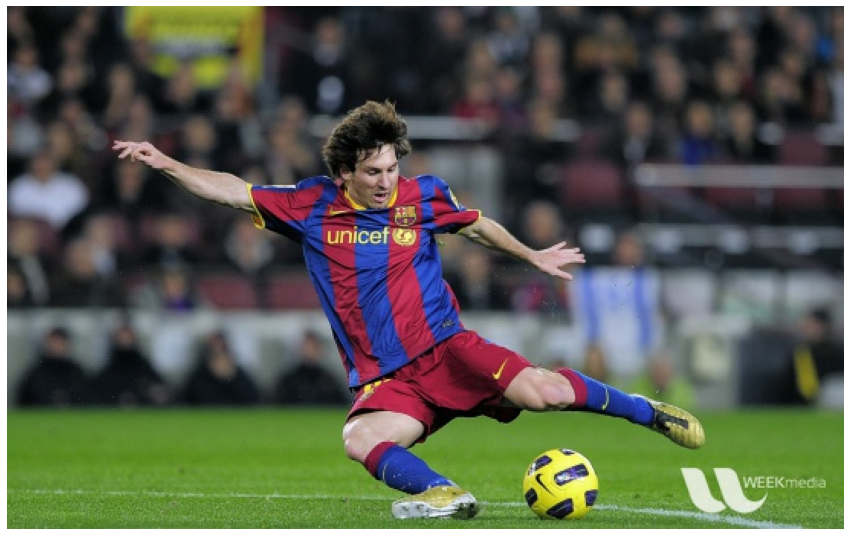

In [44]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

## Accessing images(pixel values) using OpenCV and modify them

You can access a pixel value by its row and column coordinates. For RGB image, it returns an array of Red, Blue, Green values. For grayscale image, just corresponding intensity is returned.

#### accessing R, G, B value at coordinate location (100, 100)

In [54]:
px = img_rgb[100,100] 
print(px)

[255 255 255]


#### accessing only Red pixel values

In [48]:
px_red = img_rgb[100, 100, 0]
print(px_red)

200


#### accessing only Green pixel values

In [52]:
px_green = img_rgb[100, 100, 1]
print(px_green)

166


#### accessing only Blue pixel values

In [50]:
px_blue = img_rgb[100, 100, 2]
print(px_blue)

157


#### You can modify the pixel values the same way.

In [53]:
img_rgb[100,100] = [255,255,255]
print(img_rgb[100, 100])

[255 255 255]


## Accessing Image Properties
Image properties include number of rows, columns and channels, type of image data, number of pixels etc.

#### Shape of image
It returns a tuple of number of rows, columns and channels (if image is color):

In [55]:
print(img_rgb.shape)

(342, 548, 3)


#### Total number of pixels 

In [56]:
print(img_rgb.size)

562248


#### Image datatype

In [57]:
print(img_rgb.dtype)

uint8


## Image ROI
Sometimes, you will have to play with certain region of images.

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

In [66]:
ball = img_rgb[280:340, 330:390]
img_rgb_added = img_rgb.copy()
img_rgb_added[273:333, 100:160] = ball

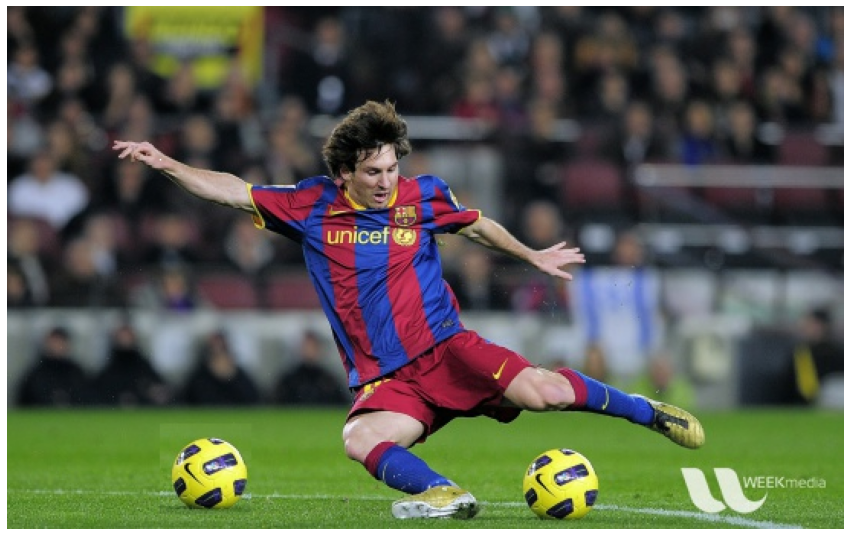

In [67]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(img_rgb_added)
plt.show()

## What is Computer Vision?

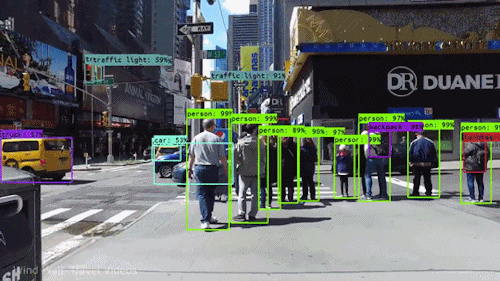

In [13]:
from IPython.display import Image
Image(filename='./resources/Image-Recoginition.gif', width=800, height=600)

# References
* https://en.wikipedia.org/wiki/A_picture_is_worth_a_thousand_words
* https://analyticsindiamag.com/what-is-the-difference-between-computer-vision-and-image-processing/

# updates are in progress !